In [2]:
import pandas as pd
import re

# Load the new dataset
file_path = 'Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
P = pd.read_csv(file_path)



In [3]:
print(P)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [4]:
P.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [5]:
# Add a new column 'category' where 'not nostalgia' is set to 1 and 'nostalgia' is set to 2
P['category'] = P['sentiment'].apply(lambda x: 1 if x == 'not nostalgia' else 2)

# Display the first few rows to confirm the changes
print(P.head())


       sentiment                                            comment  category
0  not nostalgia  He was a singer with a golden voice that I lov...         1
1      nostalgia  The mist beautiful voice ever I listened to hi...         2
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         2
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         1
4      nostalgia  listening to his songs reminds me of my mum wh...         2


In [6]:
P[0:5]

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,1
1,nostalgia,The mist beautiful voice ever I listened to hi...,2
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,2


In [7]:
P['comment'].iloc[:3].values

array(['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.',
       'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel',
       'I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.'],
      dtype=object)

In [8]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [9]:
len(P)

1500

In [10]:
P['sentiment'].value_counts()

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

In [11]:
P.isnull()

,sentiment,comment,category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [12]:
P.isnull().sum()


sentiment    0
comment      0
category     0
dtype: int64

In [13]:
P.duplicated().sum()


1

In [14]:
P[P.duplicated()]


,sentiment,comment,category
78,not nostalgia,never heard this song before... WOW What an am...,1


In [15]:
P= P.drop_duplicates()


In [16]:
P.duplicated().sum()


0

In [17]:
len(P)

1499

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Comment distribution'}, xlabel='sentiment'>

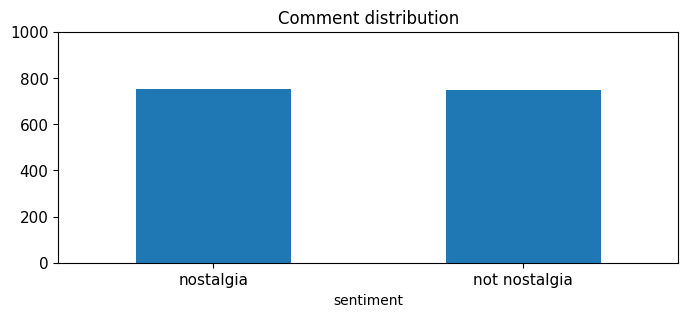

In [18]:
print(P.sentiment.value_counts())

# plot barchart for X
P.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Comment distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [19]:
P_sample = P.sample(n=900, random_state=42)


In [20]:
len(P_sample)

900

In [21]:
P_sample[0:8]

,sentiment,comment,category
1117,nostalgia,Feeling nostalgic. My school time.,2
1396,nostalgia,"Oh, cool man I miss the 1980s, but don't the o...",2
423,not nostalgia,"That describes old age, the so-called ""golden""...",1
414,nostalgia,"Omg he reminds me so much of my father, he lov...",2
452,not nostalgia,"Proper pop record, big intro, catchy tune, lov...",1
862,not nostalgia,i don't want to be leader of your gang thank y...,1
1064,not nostalgia,Her voice touches me in a way few others can. ...,1
742,not nostalgia,Outstanding collection of music and the best s...,1


sentiment
nostalgia        450
not nostalgia    450
Name: count, dtype: int64


<Axes: title={'center': 'Comment distribution'}, xlabel='sentiment'>

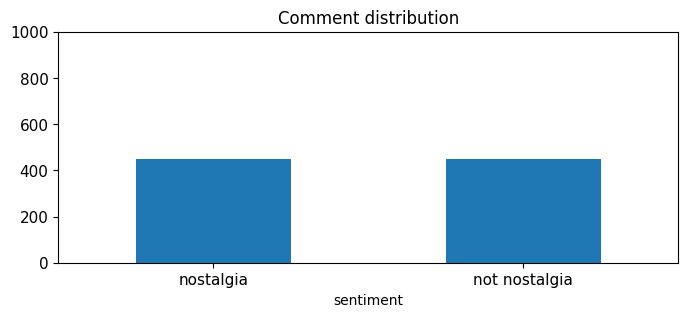

In [22]:
print(P_sample.sentiment.value_counts())

# plot barchart for X
P_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Comment distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

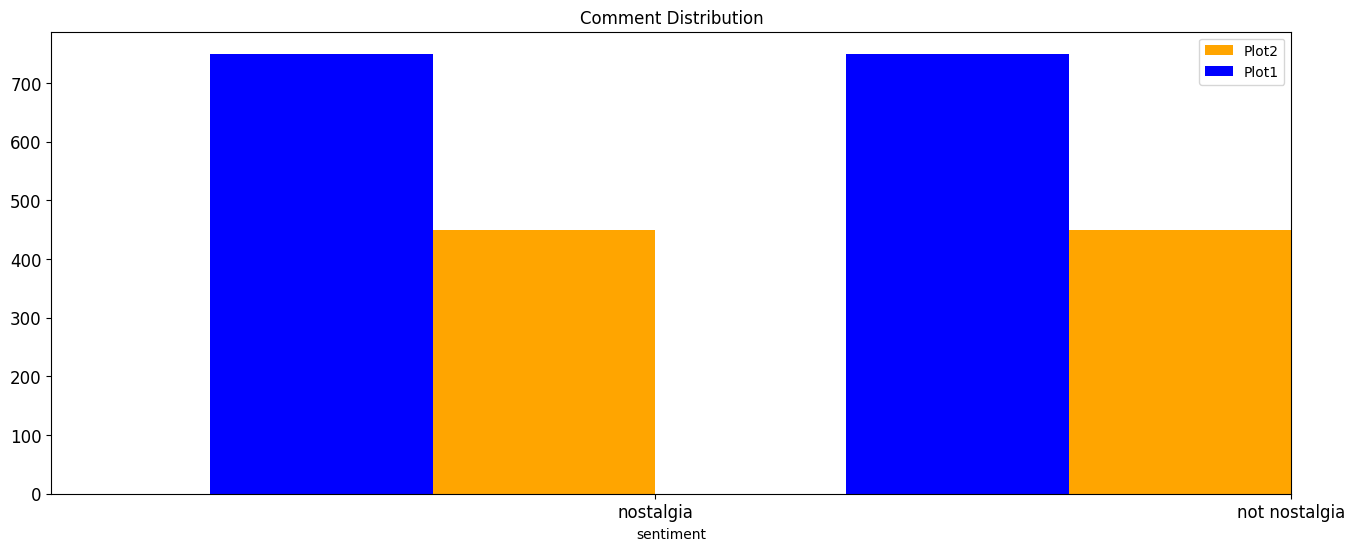

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting on the single set of axes with different colors
P_sample.sentiment.value_counts().plot(kind='bar', ax=ax, color='orange', label='Plot2', rot=0, fontsize=12, position=1, width = 0.35)

P.sentiment.value_counts().plot(kind='bar', ax=ax, title='Comment Distribution', color='blue', label='Plot1', rot=0, fontsize=12, position=2, width= 0.35)

# Set legend
ax.legend()

# Show the plot
plt.show()

In [24]:
import nltk
nltk.download('punkt')  # download required for tokenization
from nltk.tokenize import word_tokenize

P['unigrams'] = P['comment'].apply(lambda x: word_tokenize(x))


[nltk_data] Downloading package punkt to /home/envy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
P[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [26]:
P[0:4]

,sentiment,comment,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,1,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,2,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
P_counts = count_vect.fit_transform(P.comment) #learn the vocabulary and return document-term matrix
print(P_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [28]:
count_vect.get_feature_names_out()[290]

'appreciate'

In [29]:
count_vect.get_feature_names_out()[696]

'cigar'

In [30]:
analyze = count_vect.build_analyzer()

# Analyze the first record (first document) in the X dataframe
first_record_tokens = analyze(P['comment'].iloc[0])

# Print the tokenized text (unigrams) of the first document
print(first_record_tokens)

['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


In [31]:
P_counts.shape

(1499, 3730)

In [32]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_045',
 'term_07',
 'term_10',
 'term_100',
 'term_10m',
 'term_11',
 'term_11th',
 'term_12',
 'term_13',
 'term_14',
 'term_15',
 'term_150',
 'term_16',
 'term_16years',
 'term_17',
 'term_17th',
 'term_18',
 'term_19']

In [33]:
plot_y = ["doc_"+ str(i) for i in list(P.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [34]:
plot_z = P_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

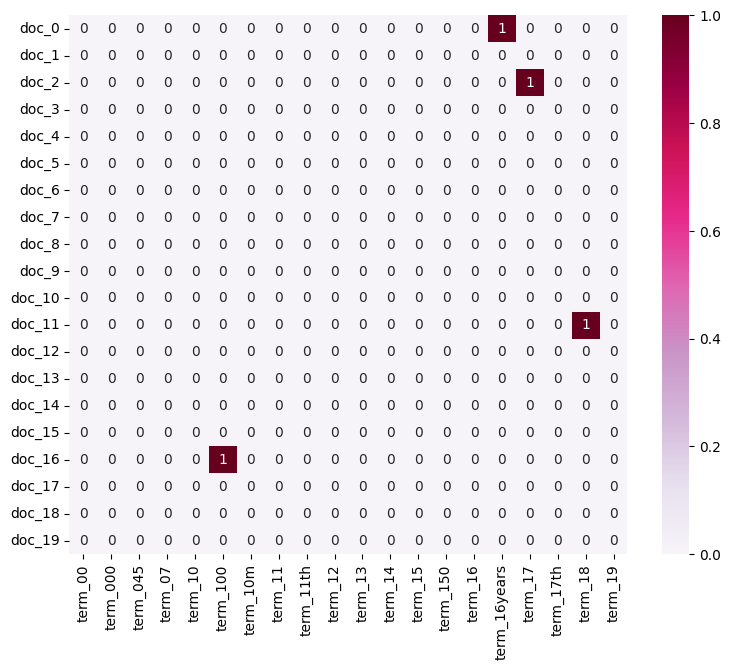

In [35]:
import seaborn as sns

P_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(P_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

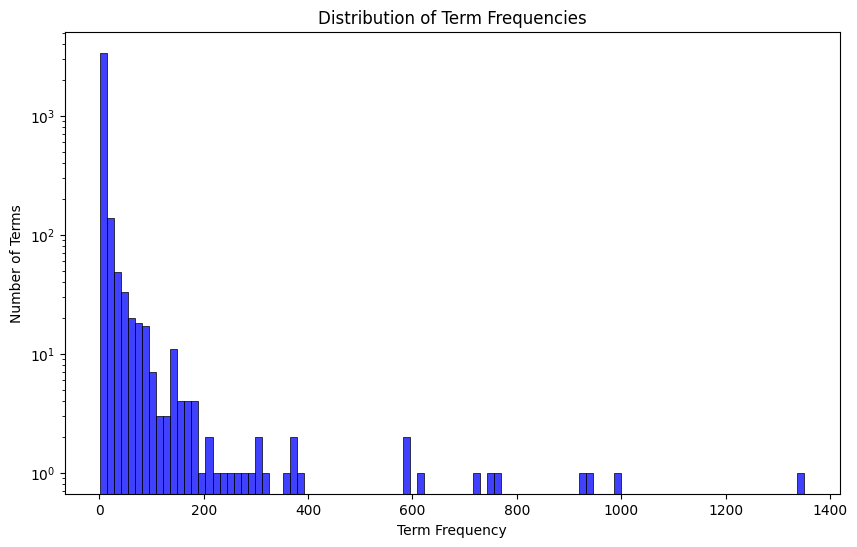

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



# To plot the entire term-document matrix or a large sample, it's impractical to visualize all due to size.
# A more efficient approach would be to visualize a summary, such as the distribution of term frequencies.

# Calculate term frequencies across all documents
full_term_frequencies = np.asarray(P_counts.sum(axis=0)).ravel()

# To make the visualization manageable, we could look at the distribution of these frequencies
plt.figure(figsize=(10, 6))
sns.histplot(full_term_frequencies, bins=100, kde=False, color='blue')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.title('Distribution of Term Frequencies')
plt.xlabel('Term Frequency')
plt.ylabel('Number of Terms')
plt.show()

In [37]:
term_frequencies = []
for j in range(0,P_counts.shape[1]):
    term_frequencies.append(sum(P_counts[:,j].toarray()))

In [38]:
term_frequencies = np.asarray(P_counts.sum(axis=0))[0]

In [39]:
term_frequencies[0] #sum of first term: 00

1

/tmp/ipykernel_23578/3480579971.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


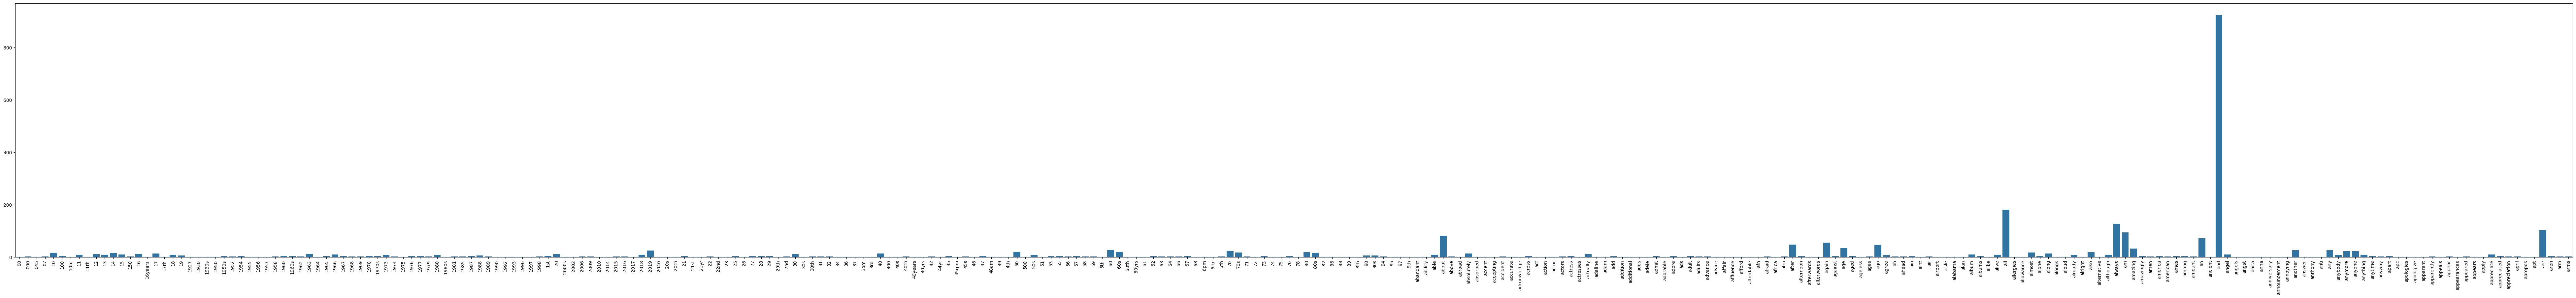

In [40]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

/tmp/ipykernel_23578/3247575956.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:90], rotation = 90);


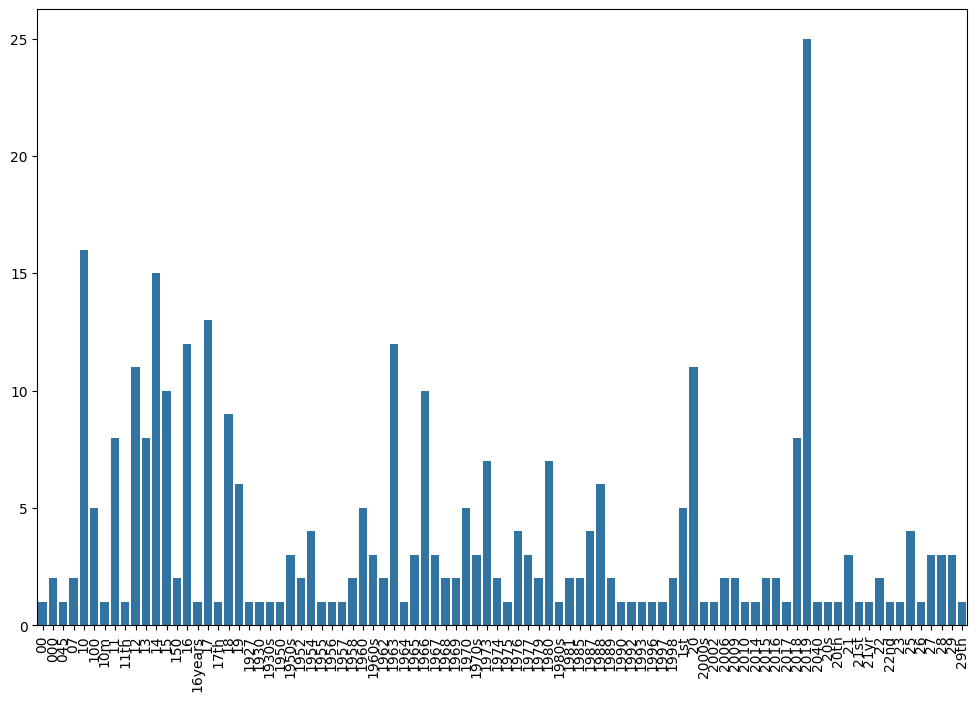

In [41]:
plt.subplots(figsize=(12, 8))
g = sns.barplot(x=count_vect.get_feature_names_out()[:90], 
            y=term_frequencies[:90])
g.set_xticklabels(count_vect.get_feature_names_out()[:90], rotation = 90);

In [42]:
import plotly.express as px

# 50 terms and their frequencies
top_terms_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:50],
    'Frequency': term_frequencies[:50]
})

# Create a bar graph using Plotly 
fig = px.bar(top_terms_df, x='Term', y='Frequency',
             title='Top 50 Term Frequencies',
             labels={'Frequency': 'Term Frequency', 'Term': 'Terms'},
             width=1000, height=500)

# Update layout for better x-axis label visibility
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()

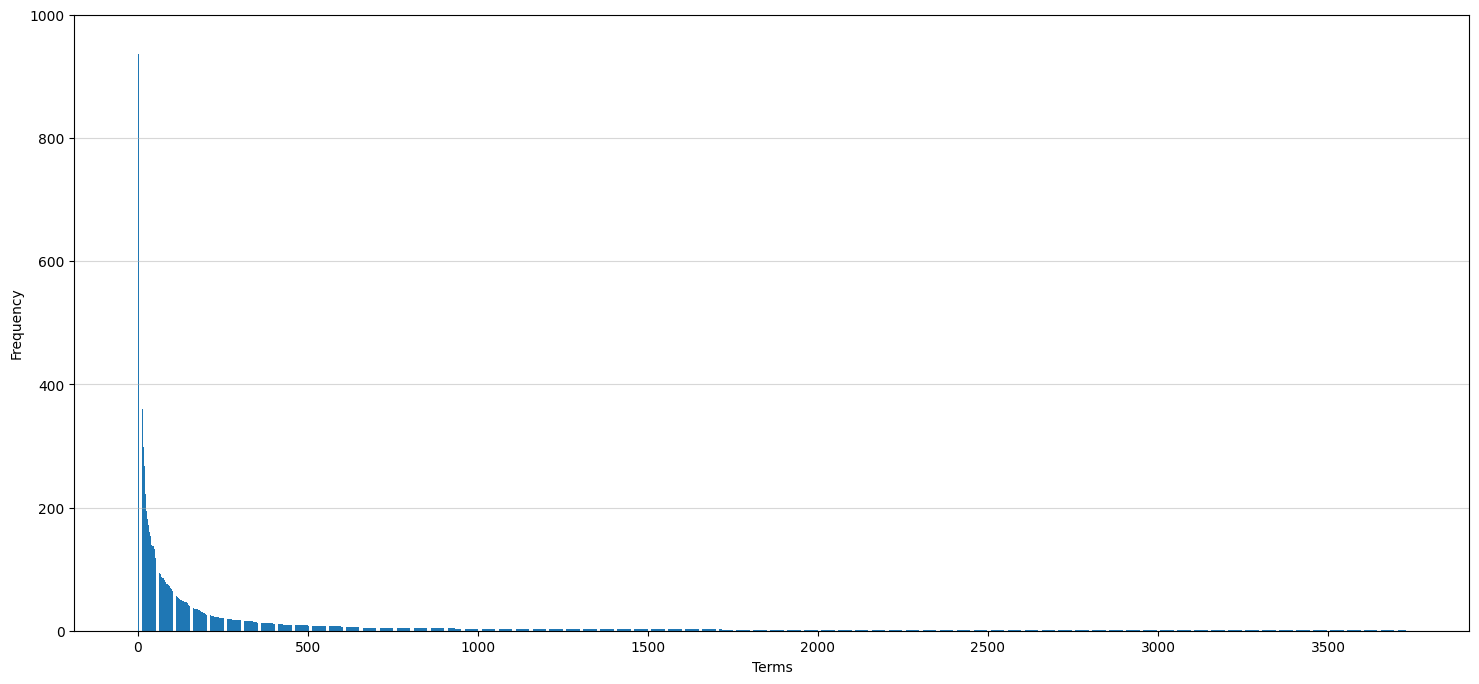

In [43]:
import matplotlib.pyplot as plt

term_frequencies = np.array(P_counts.sum(axis=0))[0]

# initiate long tail algorithim 
sorted_indices = term_frequencies.argsort()[::-1]
sorted_frequencies = term_frequencies[sorted_indices]

# Create a bar plot with sorted frequencies
plt.figure(figsize=(18, 8))
plt.bar(range(len(sorted_frequencies)), sorted_frequencies)
plt.title('')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()

In [44]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/tmp/ipykernel_23578/2166548998.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



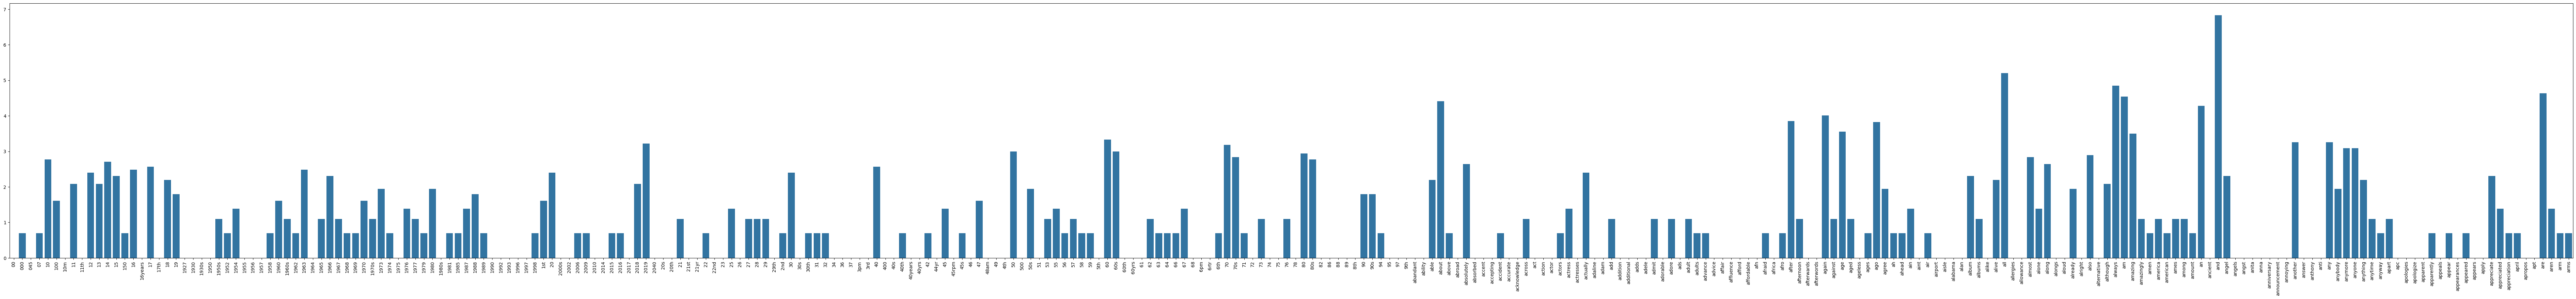

In [45]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [46]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = P['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = P[P['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(dff):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    P_counts = count_vect.fit_transform(dff['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_dff = pd.DataFrame(P_counts.toarray(), columns=words)
    
    return term_document_dff

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [48]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
print(filt_term_document_dfs.keys())


dict_keys(['not nostalgia', 'nostalgia'])


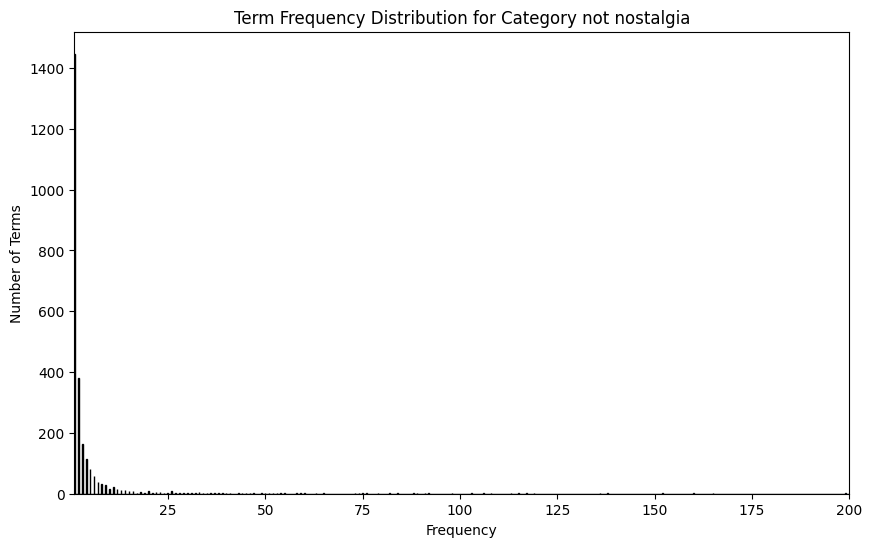

In [52]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

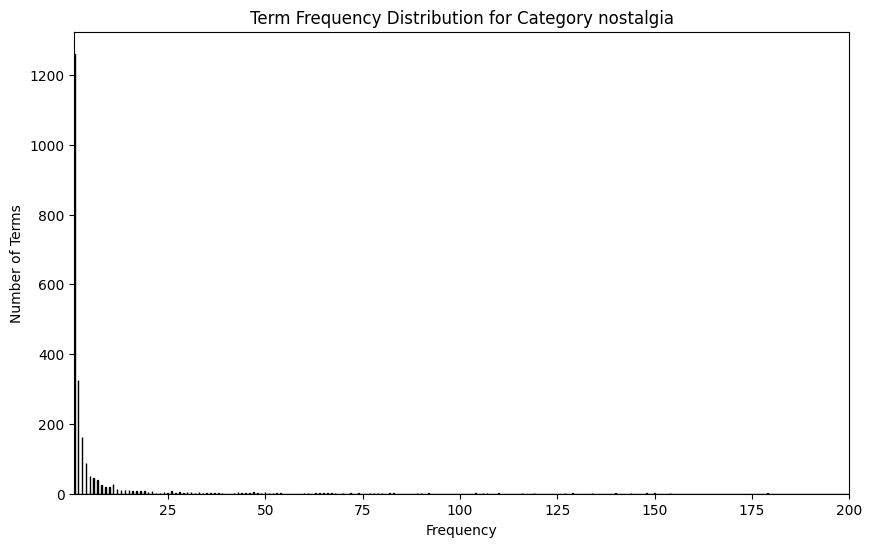

In [53]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [54]:
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at', 'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still', 'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had', 'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school', 'were', 'very', 'am', 'one', 'those', 'voice', 'every', 'be', 'him', 'never', 'heard', 'times', 'these', 'can', 'listen', 'not', 'young', 'what', 'are', 'best', 'they', 'played', 'hear', 'thank', 'sing', 'out', 'how', 'life', 'happy', 'thanks', 'then', 'radio', 'again', 'ago', 'really', 'mum', 'who', 'an', 'day', 'play', 'mom', 'there', 'some', 'our', 'after', 'came', 'passed', 'makes', 'wonderful', 'singing', 'little', 'takes']


In [55]:
sorted_counts #We can see the frequencies sorted in a descending order

array([643, 566, 545, ...,   1,   1,   1])

In [56]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2011, 1403, 2026, ..., 1713,  908, 2294])

In [57]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

643

In [58]:
category_number=0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]   # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['nearly', 'news', '94', 'not', 'headphones', 'match', 'faithful', 'fairground', 'everytime', 'pull', 'nearest', 'had', 'fry', 'gun', 'pity', 'decades', 'marin', 'eagle', 'hearts', 'focus', 'baritone', 'earnings', 'presented', 'doubt', '68', 'hearted', 'poor', 'hats', 'an', 'battle', 'ginnie', 'phoenix', 'featured', 'afford', 'announcement', 'matched', 'eh', 'nor', 'looks', 'predict', 'nerve', 'pops', 'depressing', 'embedded', 'afterwords', 'adam', '76', 'does', 'hardin', 'fifty', 'hd', 'happens', 'gucci', '27', 'posting', 'jensen', 'establishment', 'platform', 'greeted', 'appearances', 'contemporaries', 'barman', 'nc', 'never', 'problem', 'heaven', 'entertainer', 'chock', 'microphones', 'dylan', 'penny', 'neighborhood', '78', 'here', 'elvis', 'nelson', 'brilliantly', 'part', 'hears', 'ease', 'cherish', 'fore', '90', 'lyrics', 'drive', 'gen', 'either', 'moment', 'peaceful', 'nowadays', 'note', 'anybody', 'grew', 'di

In [59]:
sorted_counts #We can see the frequencies sorted in a descending order


array([708, 452, 451, ...,   1,   1,   1])

In [60]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order


array([2276, 2290,  160, ..., 1509, 1510,    0])

In [61]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

In [62]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [63]:
sorted_counts #We can see the frequencies sorted in a descending order




array([  1,   1,   1, ..., 451, 452, 708])

In [64]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order


array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [65]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

In [66]:
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine', 'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder', 'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace', 'romanticism', 'rightly']


643

In [67]:
sorted_counts #We can see the frequencies sorted in a descending order

array([  1,   1,   1, ..., 545, 566, 643])

In [68]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order


array([2294,  908, 1713, ..., 2026, 1403, 2011])

In [69]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

643

In [71]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
print(term_document_dfs.keys())


dict_keys(['not nostalgia', 'nostalgia'])


In [74]:
for category in categories:
    print(f"Processing category: {category}")
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

Processing category: not nostalgia
Processing category: nostalgia


In [76]:
print(term_document_dfs.keys())


dict_keys(['not nostalgia', 'nostalgia'])


In [77]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


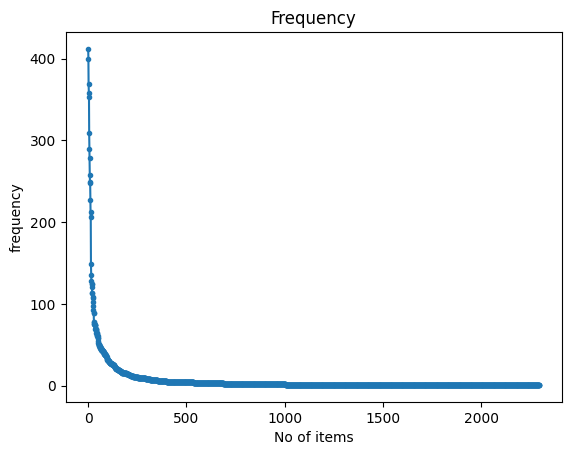

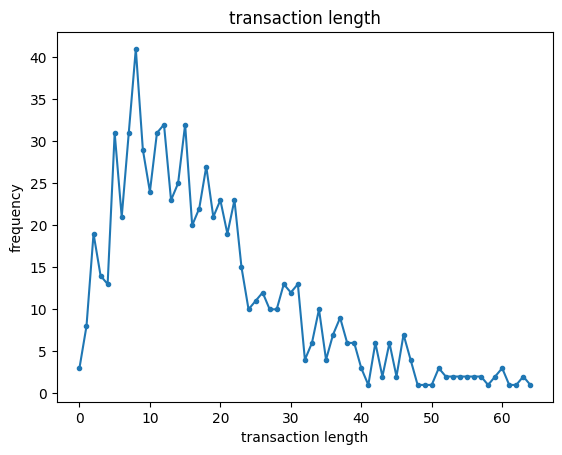

In [78]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 749
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.048064085447262
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.368399001503125
Variance in Transaction Sizes : 107.6474193755667
Sparsity : 0.9922951329417958


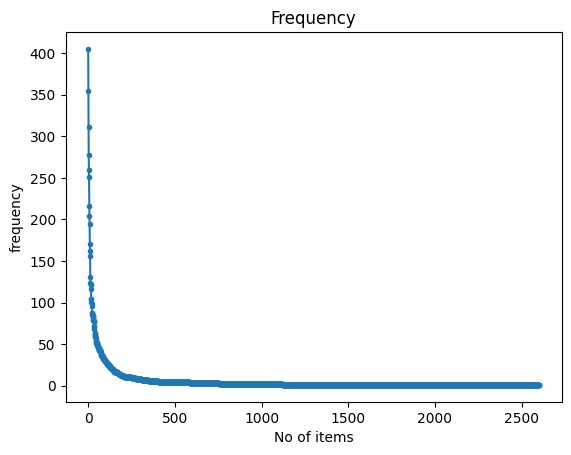

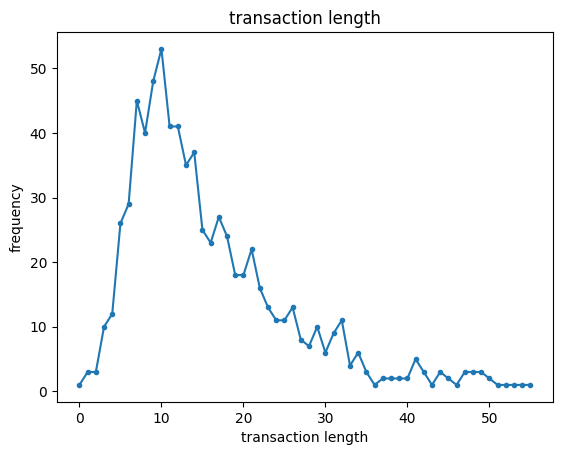

In [79]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [80]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostal= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostal))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 1.9096505641937256


In [81]:
obj1.save('freq_patterns_nostal_minSup9.txt') #save the patterns
frequentPatternsDF_nostal

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
71732,the my this,123
71733,the this,212
71734,my,400
71735,my this,252


In [82]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_notnostal= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_notnostal))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9697
Runtime: 0.4446871280670166


In [83]:
obj1.save('freq_patterns_notnostal_minSup9.txt') #save the patterns
frequentPatternsDF_notnostal

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
9692,and this the,87
9693,and the,179
9694,this,354
9695,this the,184


In [84]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_notnostal, frequentPatternsDF_nostal]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                             Patterns  Support
72336                        memories      227
74585                           to my      227
74589                        the this      212
74580                         song my      212
74587                          the my      192
...                               ...      ...
28214           just when song the my        9
28215      this just when song the my        9
28216       was just when song the my        9
28217  this was just when song the my        9
0                           favorites        9

[74590 rows x 2 columns]
Number of patterns discarded: 6844


In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
P_tdm = count_vect.fit_transform(P['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
P['tokenized_text'] = P['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=P.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = P['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(P_tdm.toarray(), columns=terms, index=P.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,just when my the to was,this my just when and song was,just when and to was,just when and to was this,just when and to my this,just when song the my,this just when song the my,was just when song the my,this was just when song the my,favorites
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [87]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


In [88]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [89]:
X_pca_tdm.shape

(1499, 2)

In [90]:
X_tsne_tdm.shape

(1499, 2)

In [91]:
X_umap_tdm.shape

(1499, 2)

In [92]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


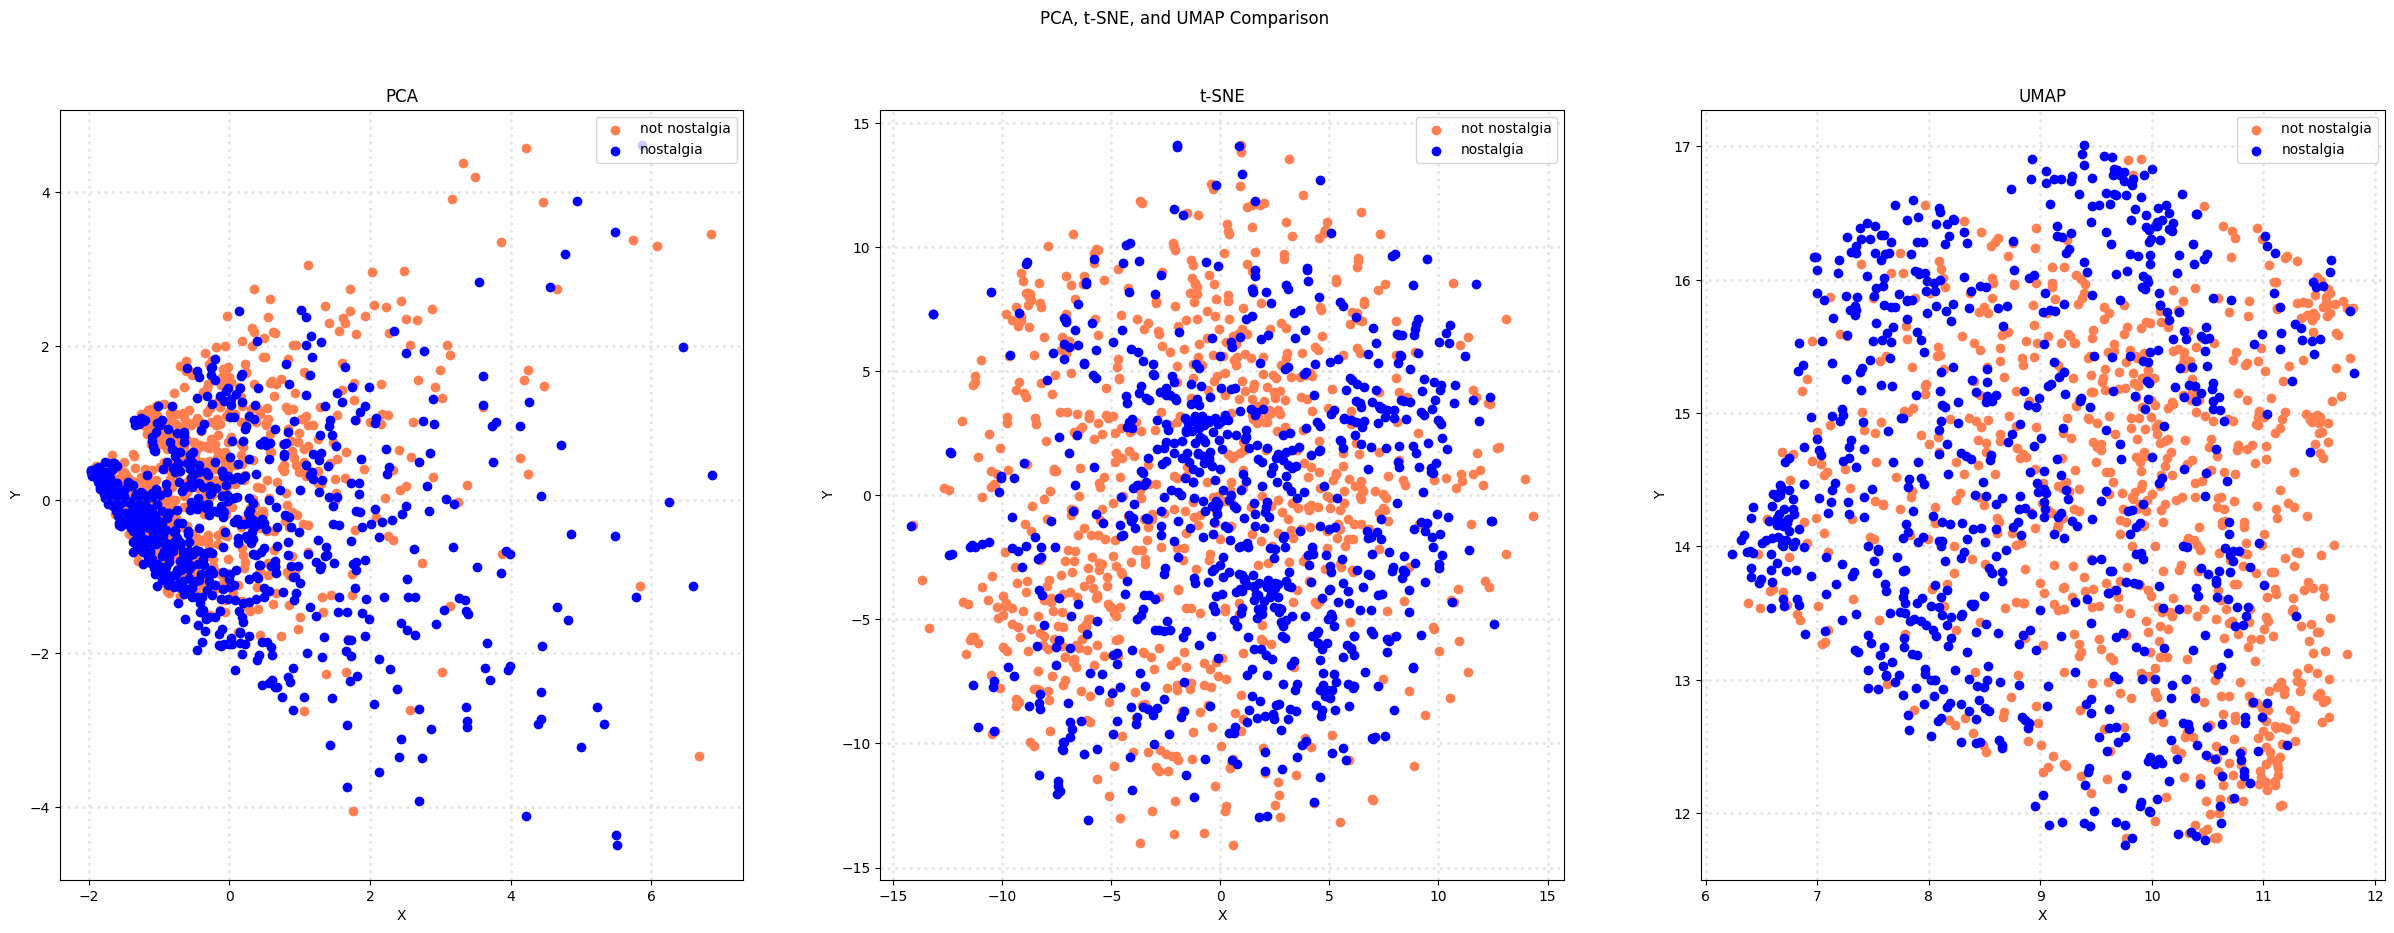

In [93]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = P['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[P['sentiment'] == category].T[0]
        ys = X_reduced[P['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [94]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

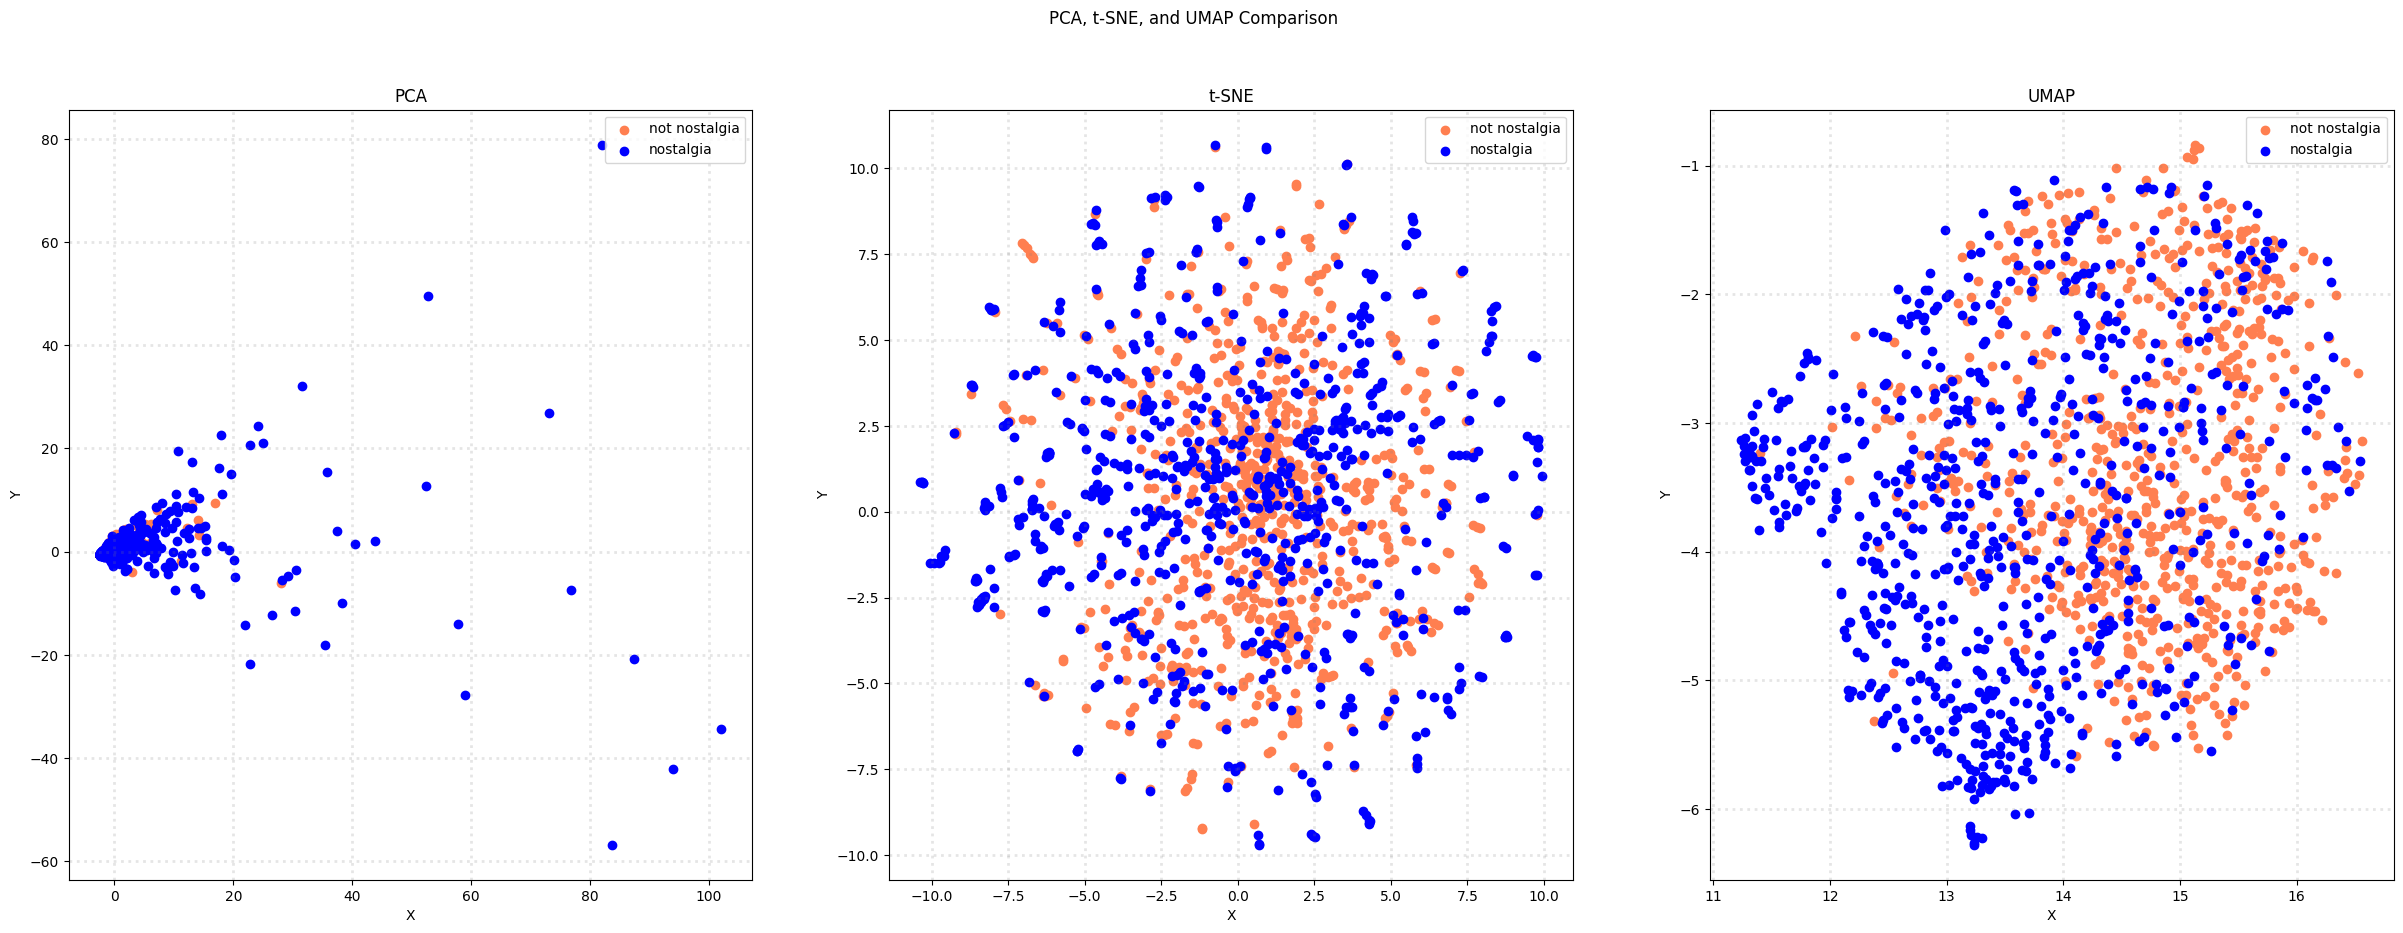

In [95]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = P['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[P['sentiment'] == category].T[0]
        ys = X_reduced[P['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

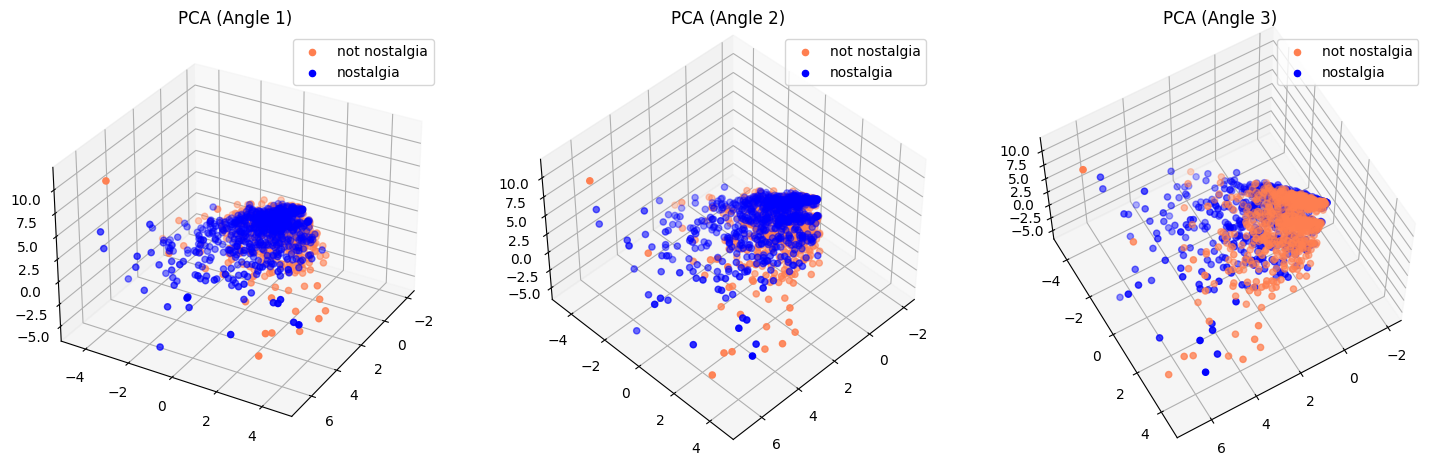

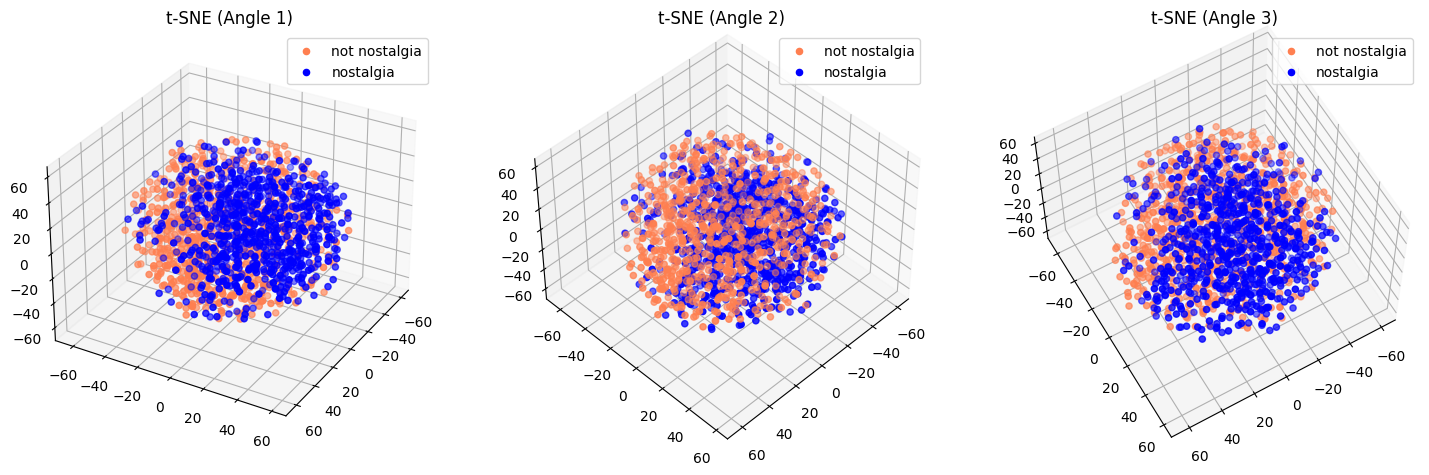

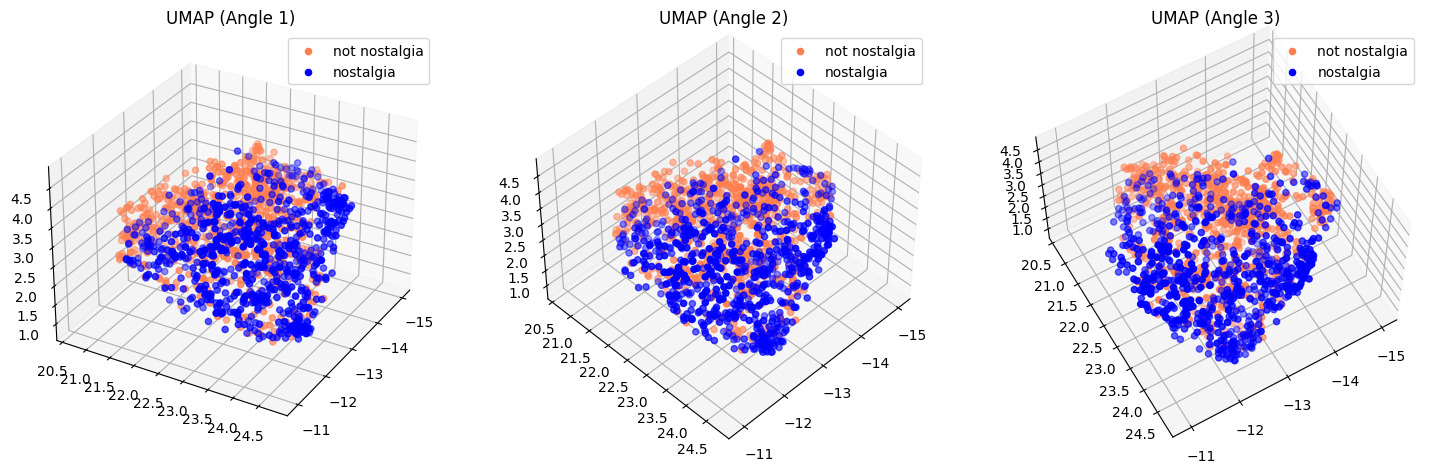

In [96]:
# Answer here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce the dimensions to 3 components
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Categories and colors
categories = P['sentiment'].unique()
col = ['coral', 'blue', 'black', 'orange']

# Function to create 3D scatter plots
def plot_3d(X_reduced, title, angle1, angle2, angle3):
    fig = plt.figure(figsize=(18, 6))

    # Plot 1
    ax = fig.add_subplot(131, projection='3d')
    ax.set_title(title + ' (Angle 1)')
    for c, category in zip(col, categories):
        xs = X_reduced[P['sentiment'] == category].T[0]
        ys = X_reduced[P['sentiment'] == category].T[1]
        zs = X_reduced[P['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle1[0], azim=angle1[1])
    ax.legend(loc='upper right')

    # Plot 2
    ax = fig.add_subplot(132, projection='3d')
    ax.set_title(title + ' (Angle 2)')
    for c, category in zip(col, categories):
        xs = X_reduced[P['sentiment'] == category].T[0]
        ys = X_reduced[P['sentiment'] == category].T[1]
        zs = X_reduced[P['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle2[0], azim=angle2[1])
    ax.legend(loc='upper right')

    # Plot 3
    ax = fig.add_subplot(133, projection='3d')
    ax.set_title(title + ' (Angle 3)')
    for c, category in zip(col, categories):
        xs = X_reduced[P['sentiment'] == category].T[0]
        ys = X_reduced[P['sentiment'] == category].T[1]
        zs = X_reduced[P['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category)
    ax.view_init(elev=angle3[0], azim=angle3[1])
    ax.legend(loc='upper right')

    plt.show()

# Define three angles (camera positions) to visualize the data
angle1 = [30, 30]
angle2 = [45, 45]
angle3 = [60, 60]

# Plot PCA, t-SNE, and UMAP with 3D reduction
plot_3d(X_pca_tdm_3d, 'PCA', angle1, angle2, angle3)
plot_3d(X_tsne_tdm_3d, 't-SNE', angle1, angle2, angle3)
plot_3d(X_umap_tdm_3d, 'UMAP', angle1, angle2, angle3)


In [97]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [98]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [99]:
mlb = preprocessing.LabelBinarizer()

In [100]:
mlb.fit(P.sentiment)

LabelBinarizer()

In [101]:
P[:10][["comment","sentiment","category"]]


,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [102]:
P['bin_category'] = mlb.transform(P['category']).tolist()

/home/envy/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/lib/arraysetops.py:733: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [103]:
P[0:9]

,sentiment,comment,category,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,1,"[He, was, a, singer, with, a, golden, voice, t...","{at, those, many, now,, vouch, still, You, I, ...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,2,"[The, mist, beautiful, voice, ever, I, listene...","{The, forgotten, still, I, was, love, ever, be...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{at, songs., grew, little, job, just, smooth, ...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{is, Lou, 2nd, tour., pray, Lou., 30, 47, Viet...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,2,"[listening, to, his, songs, reminds, me, of, m...","{listening, him, everyday, of, played, who, mu...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...",2,"[Every, time, I, heard, this, song, as, a, chi...","{time, as, cry....because, reminded, many, sti...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",2,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{70's, changes, loved, I, was, me, when, dad, ...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,2,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{nostalgic, feeling, I, me, puts, love, am, wi...",[0]
8,not nostalgia,Wherever you are you always in my heart,1,"[Wherever, you, are, you, always, in, my, heart]","{heart, you, in, always, my, Wherever, are}",[0]


In [104]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = P.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = P.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = P.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [105]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [106]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [107]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


In [108]:
P[:10][["comment","sentiment","category"]]

,comment,sentiment,category
0,He was a singer with a golden voice that I lov...,not nostalgia,1
1,The mist beautiful voice ever I listened to hi...,nostalgia,2
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,2
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,1
4,listening to his songs reminds me of my mum wh...,nostalgia,2
5,"Every time I heard this song as a child, I use...",nostalgia,2
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia,2
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia,2
8,Wherever you are you always in my heart,not nostalgia,1
9,Elvis will always be number one no one can com...,not nostalgia,1


In [109]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(P[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, P['category'], test_size=0.3, random_state=42)

In [110]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.94      0.78      0.85       217
    nostalgia       0.82      0.95      0.88       233

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



In [113]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(P[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, P['category'], test_size=0.3, random_state=42)

In [114]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,just when my the to was,this my just when and song was,just when and to was,just when and to was this,just when and to my this,just when song the my,this just when song the my,was just when song the my,this was just when song the my,favorites
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,just when my the to was,this my just when and song was,just when and to was,just when and to was this,just when and to my this,just when song the my,this just when song the my,was just when song the my,this was just when song the my,favorites
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.8133333333333334

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.73      0.96      0.83       217
    nostalgia       0.95      0.68      0.79       233

     accuracy                           0.81       450
    macro avg       0.84      0.82      0.81       450
 weighted avg       0.84      0.81      0.81       450

